# Telco Churn Project

Ryvyn Young   
Codeup Data Science Team   
9/23/2020

In [3]:
# import libraries and functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from acquire import get_telco_data
#from prepare import prep_telco_data

In [4]:
# run function to get data using acquire.py and verify data shape
telco = get_telco_data()
telco.shape

(7043, 24)

summarize data (.info(), .describe(), .value_counts(), ...)

In [10]:
# Summarize Data
print(telco.info())
print(telco.describe().T, "\n")
print(telco.nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

plot distributions of individual variables

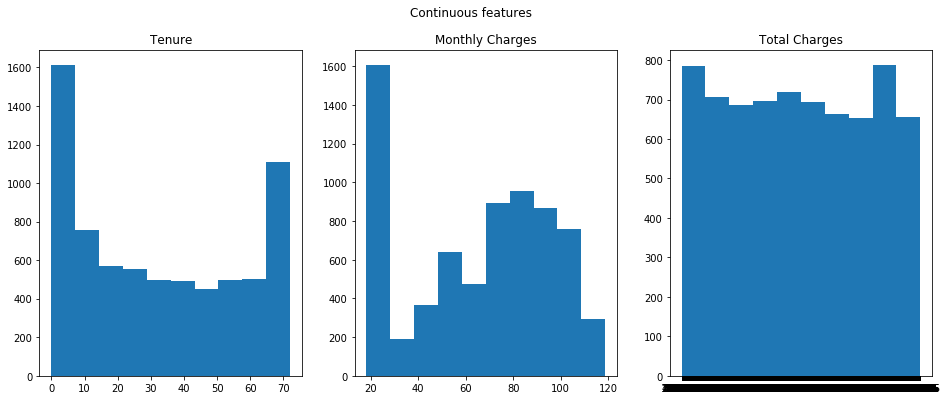

In [18]:
plt.figure(figsize=(16, 6))
plt.suptitle(f'Continuous features')

plt.subplot(131)
plt.hist(telco.tenure)
plt.title('Tenure')

plt.subplot(132)
plt.hist(telco.monthly_charges)
plt.title('Monthly Charges')

plt.subplot(133)
plt.hist(telco.total_charges)
plt.title('Total Charges')


plt.show()

In [ ]:
# run function to prepare data using prepare.py and verify train, validate, and test shape
#train, validate, test = prep_telco_data(telco)
#print(train.shape, validate.shape, test.shape)